In [1]:
outdir = '../output'

In [2]:
import numpy as np
import pandas as pd
import plot_tools as pt
import data_tools as dt

In [3]:
idx = pd.IndexSlice

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data

In [5]:
df_world = dt.load_country()

In [6]:
df_state = dt.load_state()

In [7]:
df_county = dt.load_county()

### Countries

In [8]:
world_names = {
    'USA': 'USA',
    'ITA': 'Italy',
    'DEU': 'Germany',
    'GBR': 'UK'
}

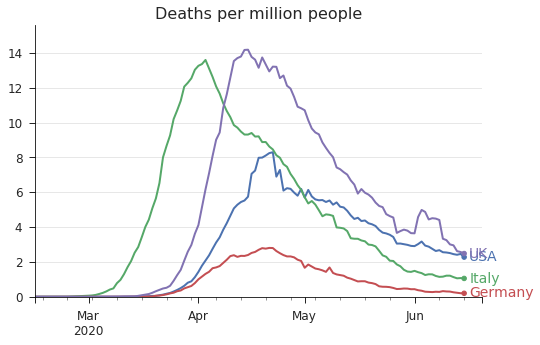

In [9]:
fig, ax = pt.plot_progress(df_world['deaths_pc'], names=world_names)
ax.set_xlabel('')
ax.set_title(f'Deaths per million people')
fig.savefig(f'{outdir}/country_deaths.svg', bbox_inches='tight')

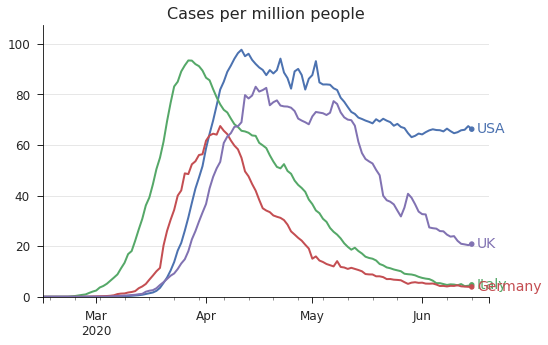

In [10]:
fig, ax = pt.plot_progress(df_world['cases_pc'], names=world_names)
ax.set_xlabel('')
ax.set_title(f'Cases per million people')
fig.savefig(f'{outdir}/country_cases.svg', bbox_inches='tight')

### States

In [11]:
state_names = ['CA', 'PA', 'IL', 'WI', 'AZ']

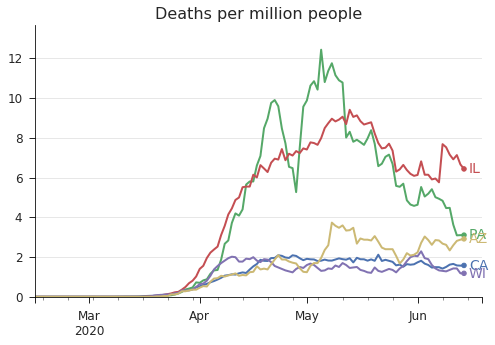

In [12]:
fig, ax = pt.plot_progress(df_state['deaths_pc'], names=state_names)
ax.set_xlabel('')
ax.set_title(f'Deaths per million people')
fig.savefig(f'{outdir}/state_deaths.svg', bbox_inches='tight')

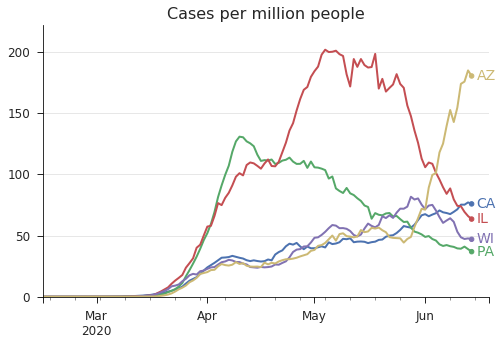

In [13]:
fig, ax = pt.plot_progress(df_state['cases_pc'], names=state_names)
ax.set_xlabel('')
ax.set_title(f'Cases per million people')
fig.savefig(f'{outdir}/state_cases.svg', bbox_inches='tight')

### Counties

In [14]:
county_names = [
    'Los Angeles, CA',
    'Allegheny, PA',
    'Erie, NY',
    'King, WA',
    'Philadelphia, PA'
]

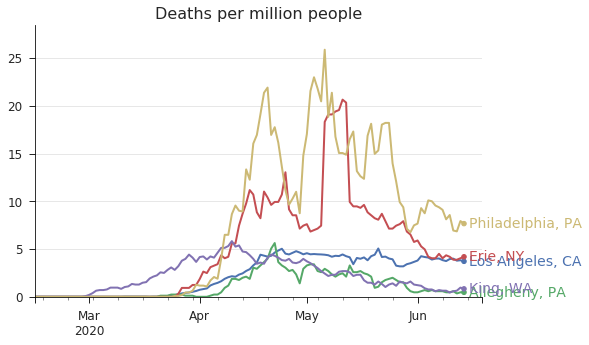

In [15]:
fig, ax = pt.plot_progress(df_county['deaths_pc'], names=county_names)
ax.set_xlabel('')
ax.set_title(f'Deaths per million people')
fig.savefig(f'{outdir}/county_deaths.svg', bbox_inches='tight')

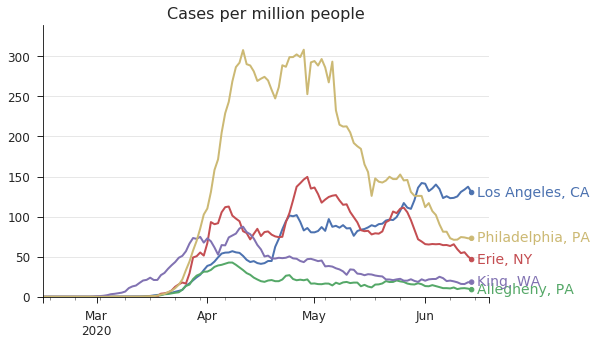

In [16]:
fig, ax = pt.plot_progress(df_county['cases_pc'], names=county_names)
ax.set_xlabel('')
ax.set_title(f'Cases per million people')
fig.savefig(f'{outdir}/county_cases.svg', bbox_inches='tight')

### EU

In [17]:
eu_codes = [
    'AUS', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST',
    'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA',
    'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK',
    'SVN', 'ESP', 'SWE'
]
df_eu = df_world.loc[:, idx[:, eu_codes]]

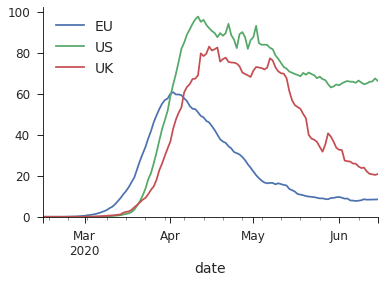

In [50]:
df_cases = pd.DataFrame({
    'EU': df_eu['cases'].sum(axis=1)/df_eu['pop'].sum(axis=1),
    'US': df_world['cases_pc']['USA'],
    'UK': df_world['cases_pc']['GBR']
})
(1e6*df_cases).rolling(7).mean().loc['2020-02-15':].plot(ylim=(0, None));

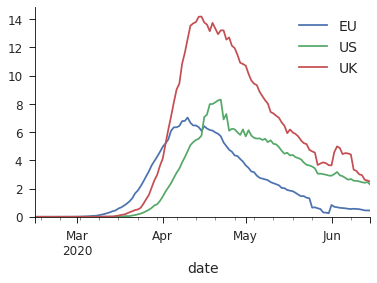

In [54]:
df_cases = pd.DataFrame({
    'EU': df_eu['deaths'].sum(axis=1)/df_eu['pop'].sum(axis=1),
    'US': df_world['deaths_pc']['USA'],
    'UK': df_world['deaths_pc']['GBR']
})
(1e6*df_cases).rolling(7).mean().loc['2020-02-15':].plot(ylim=(0, None));

### Testing

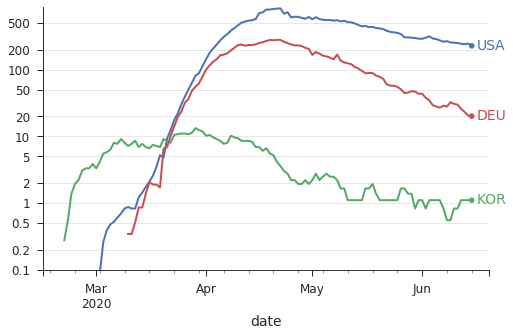

In [71]:
fig, ax = pt.plot_progress(df_world['deaths_pc'], names=['USA', 'KOR', 'DEU'], log=True, per=1e8)